 # Time series prediction
 
 Predict kW 48 hours ahead of current time.
 
 In this data reading of meter is bi-hourly. We have to get houly reading in predictions. 
 
 For optimization, our prediction shold not be deviated more than ±5kWh.
 
 ## To Do
 
 1- Sampling(convert bi-hourly data into hourly data)
 
 2- Filling the Data
 
 3- Sorting the data timewise
 
 4- Analysis

In [22]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
from matplotlib.pylab import rcParams
#rcPramas['figure.figsize'] = 10, 6

In [23]:
dataset = pd.read_csv("3098000032-Mar18-Mar19.csv")

In [24]:
dataset.head(100)

,serial,kWh,kW,kVARh,kVAR,Time_stamp
0,3098000032,10.854,0.000,7.814,0.002,2018-03-01 15:30:00
1,3098000032,10.750,0.000,7.813,0.000,2018-03-01 14:30:00
2,3098000032,12.325,0.086,8.302,0.076,2018-03-05 09:00:00
3,3098000032,12.372,0.094,8.345,0.086,2018-03-05 09:30:00
4,3098000032,12.415,0.086,8.386,0.082,2018-03-05 10:00:00
...,...,...,...,...,...,...
95,3098000032,12.282,0.000,8.264,0.000,2018-03-02 11:30:00
96,3098000032,25.000,0.100,13.023,0.088,2018-03-07 07:30:00
97,3098000032,25.047,0.094,13.066,0.086,2018-03-07 08:00:00
98,3098000032,25.089,0.084,13.107,0.082,2018-03-07 08:30:00


In [25]:
dataset.describe()

,serial,kWh,kW,kVARh,kVAR
count,1.746200e+04,17462.000000,17462.000000,17462.000000,17462.000000
mean,3.098000e+09,2747.256710,0.750874,1006.527078,0.257706
std,0.000000e+00,1704.039572,1.097139,543.763389,0.247171
min,3.098000e+09,10.750000,0.000000,7.813000,0.000000
25%,3.098000e+09,1358.445000,0.100000,552.427750,0.080000
50%,3.098000e+09,2981.975000,0.212000,1160.990000,0.190000
75%,3.098000e+09,3670.370000,0.834000,1486.230000,0.366000
max,3.098000e+09,6783.840000,6.520000,1721.550000,1.532000


In [26]:
dataset.shape

(17462, 6)

In [27]:
dataset.dtypes

serial          int64
kWh           float64
kW            float64
kVARh         float64
kVAR          float64
Time_stamp     object
dtype: object

In [28]:
#For checking missing values in dataset
dataset.isna().sum()

serial        0
kWh           0
kW            0
kVARh         0
kVAR          0
Time_stamp    0
dtype: int64

dataset.kW.plot()

In [29]:
dataset['Time_stamp'] = pd.to_datetime(dataset['Time_stamp'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Time_stamp'])
df = pd.DataFrame(dataset, columns=['kW', 'Time_stamp'])

In [30]:
#df['Time'] = pd.to_datetime(dataset.Time_stamp)

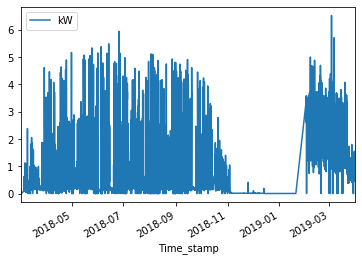

In [31]:
import matplotlib.pyplot as plt
df.plot(x='Time_stamp', y='kW', kind='line') 
plt.show()

In [32]:
#Number of time_stamp per month
df.Time_stamp.dt.month.value_counts()

3     2759
8     1462
5     1452
12    1440
4     1429
9     1427
11    1421
7     1413
10    1257
2     1239
6     1232
1      931
Name: Time_stamp, dtype: int64

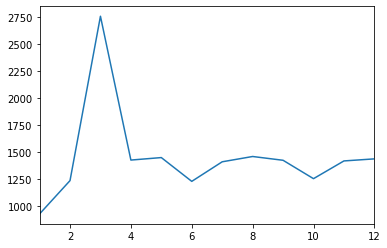

In [33]:
#Line plot of Number of time_stamp per month
df.Time_stamp.dt.month.value_counts().sort_index().plot()

In [14]:
df.Time_stamp.min()

Timestamp('2018-03-01 14:30:00')

In [15]:
df.Time_stamp.max()

Timestamp('2019-04-01 00:00:00')